# Convolutional Neural Networks

### SET UP

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

np.random.seed(0) 
tf.random.set_seed(0)

### FORMATTING DATA

In [3]:
img_rows, img_cols = 28, 28  
num_classes = 10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

### DEFINE THE MODEL

In [4]:
def create_CNN():
    #random.seed(0) 
     # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

### TRAINING AND EVALUATION

In [5]:
batch_size = 32
epochs = 20

random.seed(0)
model_CNN=create_CNN()

history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/matteo/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.4331 - loss: 1.5907 - val_acc: 0.9440 - val_loss: 0.2068
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - acc: 0.8686 - loss: 0.4234 - val_acc: 0.9629 - val_loss: 0.1260
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.9088 - loss: 0.3028 - val_acc: 0.9705 - val_loss: 0.0956
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - acc: 0.9225 - loss: 0.2531 - val_acc: 0.9766 - val_loss: 0.0773
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.9366 - loss: 0.2127 - val_acc: 0.9790 - val_loss: 0.0680
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - acc: 0.9426 - loss: 0.1910 - val_acc: 0.9813 - val_loss: 0.0573
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - acc: 0.9496 - loss: 0.1706 - val_acc: 0.9835 - val_loss: 0.0550
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - acc: 0.9524 - loss: 0.1572 - val_acc: 0.9848 - val_loss: 0.0491
Epoch 9/20
1875/1875 ━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9899 - loss: 0.0334

Test loss: 0.027221903204917908
Test accuracy: 0.9912999868392944


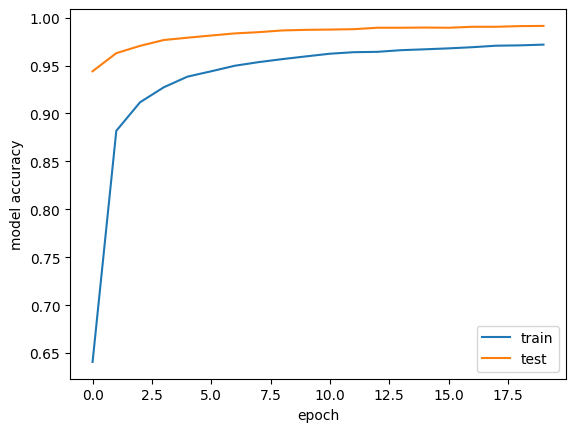

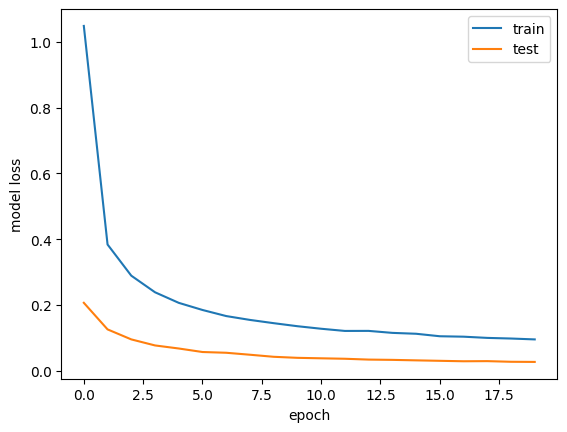

In [6]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


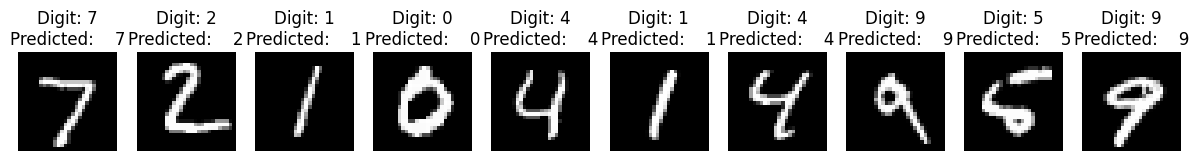

In [7]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### HAND WRITTEN DIGITS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


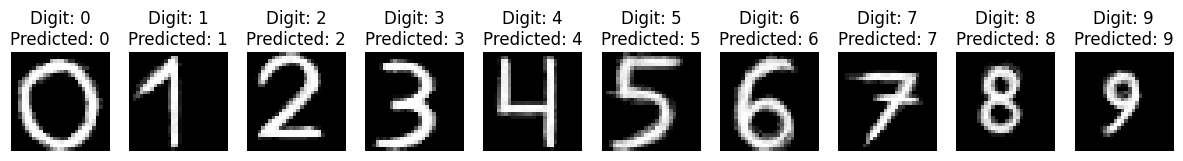

In [8]:
from PIL import Image

digit_filenames = [
    "digits/0.png",
    "digits/1.png",
    "digits/2.png",
    "digits/3.png",
    "digits/4.png",
    "digits/5.png",
    "digits/6.png",
    "digits/7.png",
    "digits/8.png",
    "digits/9.png"
]

data = []

for filename in digit_filenames:
    digit_image = Image.open(filename).convert('L')
    width, height = digit_image.size
    pixels = digit_image.load()
    img_array = np.zeros((width, height))
    for y in range(height):
        for x in range(width):
            img_array[x, y] = pixels[y, x] / 255
    data.append(img_array)

predictions = [0] * 10
for i in range(10):
    reshaped_data = data[i].reshape(1, width, height, 1)
    predictions[i] = model_CNN.predict(reshaped_data)
    data[i] = data[i].reshape(width, height)

plt.figure(figsize=(15, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Digit: {i}\nPredicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.show()